# Coursera Capstone Project - Final Course for the IBM Data Science Certificate

In this notebook, a problem is identified and described, the choices to solve it are discussed and the steps taken in order to prepare the data and build the model are explained. 

This is the final assignment for the last course of the IBM Data Science Professional Certificate. 

## Using Machine Learning models for predicting accidents and their severity

### 1. Introduction

In the United States, around 6 Million car crashes happen every year, and more than 90 people die in car accidents every day. ([Source](https://www.driverknowledge.com/car-accident-statistics/)) These accidents can pose a significant inconvenience for cities and municipalities, as they have to deal with the consequences like traffic jams, the costs for repairing or replacing public property which was damaged, and the bad image it gives their voters. Therefore, a certain interest lies in investing into a method which could reduce the occurence of car accidents. 

Different approaches to reduce the number of accidents can be advanced driver assistance systems, awareness campaigns, or prediction systems, which can inform drivers when the probability for an accident is high in order for them to pay more attention. In this report, a dataset from Seattle containing all the accidents recorded since 2004 until present, including all types of collisions, is used to build a machine learning (ML) model which is able to predict accidents and their severity. A description file of the data can be found [here](https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Metadata.pdf). There is a considerable amount of factors which can lead to an accident and which affect the severity of those. Therefore, the most significant factors will be identified and used for building the predictive model. 

The report consists of six Chapters; an Introduction, where the general problem and approach are described, followed by a Chapter to describe the data used. Next, the Methodology used to build the model is discussed. The results are presented in the next Chapter, followed by a Discussion, and finally the Conclusion. 


### 2. The Dataset

As mentioned in the previous chapter, the dataset used for the ML model contains ddata of accidents that have occured in Seattle in the United States, since 2004. in September 2020, the dataset consists of 194 673 rows and 38 columns. This means that since the starting year of the data collection (2004) until present, almost 200 000 accidents have been recorded. Furthermore, there are 38 attributes to each row, of which the relevance is identified in course of the data cleaning and preparation phase. 

The severity of accidents is represented through a "severity code", where 
• 3 means fatality 
• 2b means serious injury 
• 2 means injury 
• 1 means property damage, and 
• 0 means unknown, or no record of fatalities, injuries or property damage. 

This code is what is to be predicted by the ML model. Other columns contain specified information on the severity, like the number of fatalities, injuries, and other. This information can be useful to find patterns between the number of fatalities, injuries, etc. and different conditions mentioned further below. The time and date of the incident are stored for every incident. This information could be useful to identify patterns based on the month, or even day of the week. Next, there are various columns describing different conditions, for example the condition of the driver (drunk, inattentive), the weather conditions, road conditions, whether or not the pedestrian right of way was granted or not, to name a few. These attributes will likely be very useful for the prediction model. Finally, a code dictionary for a closer description of the event is provided. Its relevance, just like that of the other attribute, is identified during the data cleaning and preparation phase which are described in the Methodology chapter. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
#Download the CSV file from the IBM cloud

!wget -O Data-Collisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

--2020-09-29 09:14:52--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘Data-Collisions.csv’

100%[======================================>] 73,917,638  30.0MB/s   in 2.3s   

2020-09-29 09:14:55 (30.0 MB/s) - ‘Data-Collisions.csv’ saved [73917638/73917638]



In [4]:
#read the csv file into a Pandas dataframe and display the first 5 rows
df = pd.read_csv('Data-Collisions.csv')
df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


Lets look at the amount of rows and columns in our dataset.

In [6]:
df.shape

(194673, 38)



Before we start cleaning the dataset, lets have a look at a few things, for example the number of accidents during the years.

For that, we create a column for the years by creating a datetime object from the INCDTTM column CONTINUE

In [34]:
import datetime as dt

df['time'] = pd.to_datetime(df['INCDTTM'])
df['year'] = df['time'].dt.year
#df['year'].tail(20)


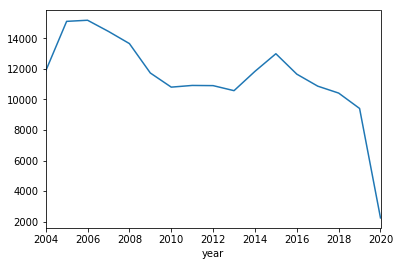

In [46]:
#groupedYear = df.groupby(by = "year")
df_new = df.groupby('year', axis=0).size()
df_new.plot()


COMMENT ABOUT PLOT 


The next steps will be to identify the relevant attributes and to drop irrelevant columns. In

We can see that for the columns EXCEPTRSNCODE and EXCEPTRSNDESC, no description is provided. Lets look at the unique input values of the two columns to see if we can understand more about them:

In [14]:
print(df['EXCEPTRSNCODE'].unique())
print(df['EXCEPTRSNDESC'].unique())

[' ' nan 'NEI']
[nan 'Not Enough Information, or Insufficient Location Information']


It is not clear what information these two columns provide, therefore they are dropped from the dataset.
We drop the following columns: 
INTKEY (Key that corresponds to the intersectionassociated with a collision)


In [15]:
df.drop(['EXCEPTRSNCODE','EXCEPTRSNDESC'], axis=1, inplace=True)
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


Before 

First looks at the dataset: 
- accidents during the years (trends? changes? year with highest/lowest number of accidents?)
- accidents depending on weather condition
- number of accidents with fatalities/injuries/none
...